# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
#import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

576

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
import json 
import requests


#target_url = "http://api.openweathermap.org/data/2.5/weather?q=rikitea&APPID=8f0b0efa2c2a1bd9fba87e03fc58338d"

api_key = '8f0b0efa2c2a1bd9fba87e03fc58338d'
WeatherData = {"City":["ABC","XYZ"],"Cloudiness":[1,2], "Country":["A","B"],"Date":[1000000,1000001],"Humidity":[1,2],
               "Lat":[11.1,22.2],"Lng":[11.1,22.2],"Max Temp":[100,200],"Wind Speed":[10,20]}
#AddRow = {"City":[],"Cloudiness":[],"Country":[],"Date":[],"Humidity":[],"Lat":[],"Lng":[],"Max Temp":[],"Wind Speed":[]}

WeatherDF = pd.DataFrame(WeatherData)

for target_city in cities:
    target_url = ('http://api.openweathermap.org/data/2.5/weather?q={0}&APPID={1}').format(target_city, api_key) 
    
    try:
        response = requests.get(target_url)
        Data_json = response.json()
#Assign Json to DataFrame
        print(target_city + "# " + str(Data_json["id"]) + " is being loaded.")
        WeatherData["City"] = Data_json["name"]
        WeatherData["Cloudiness"] = Data_json["clouds"]["all"]
        WeatherData["Country"] = Data_json["sys"]["country"]
        WeatherData["Date"] = Data_json["dt"]
        WeatherData["Humidity"] = Data_json["main"]["humidity"]
        WeatherData["Lat"] = Data_json["coord"]["lat"]
        WeatherData["Lng"] = Data_json["coord"]["lon"]
        WeatherData["Max Temp"] = Data_json["main"]["temp_max"]-273.15
        WeatherData["Wind Speed"] = Data_json["wind"]["speed"]
        WeatherDF = WeatherDF.append(WeatherData, ignore_index=True)
    except KeyError:
        print(target_city + " is not available.")
    
#Change C to F
WeatherDF["Max Temp"] = WeatherDF["Max Temp"] * 1.8 + 32

#Change m/s to mph
WeatherDF["Wind Speed"] = WeatherDF["Wind Speed"] * 2.23693629

WeatherDF = WeatherDF.drop([0,1])
WeatherDF.reset_index(inplace = True, drop=True)

print("Download complete!")

WeatherDF.to_csv("Global_Weather.csv")
    

hasaki# 2112802 is being loaded.
souillac# 3026644 is being loaded.
farafangana# 1065158 is being loaded.
avarua# 4035715 is being loaded.
road town# 3577430 is being loaded.
busselton# 2075265 is being loaded.
ingham# 2162737 is being loaded.
whitehorse# 6180550 is being loaded.
ushuaia# 3833367 is being loaded.
abalak# 2448245 is being loaded.
cape town# 3369157 is being loaded.
bambous virieux# 1106677 is being loaded.
sao filipe# 3374210 is being loaded.
puri# 1635111 is being loaded.
bredasdorp is not available.
taolanaro is not available.
jamame# 56399 is being loaded.
merritt island# 4164092 is being loaded.
warri is not available.
rikitea# 4030556 is being loaded.
brae is not available.
ahumada is not available.
illoqqortoormiut is not available.
petropavlovsk-kamchatskiy is not available.
sao jose da coroa grande# 3388456 is being loaded.
taltal# 3870243 is being loaded.
beloha# 1067565 is being loaded.
vaitupu is not available.
labuhan# 1641899 is being loaded.
port elizabeth

bayan# 2030079 is being loaded.
tarakan is not available.
shahrud# 135423 is being loaded.
hukuntsi# 933726 is being loaded.
bumiayu# 7036993 is being loaded.
awjilah# 88533 is being loaded.
tateyama# 1849876 is being loaded.
kruisfontein is not available.
swift current# 6160603 is being loaded.
gafargaon# 1185218 is being loaded.
saint-paul# 3023532 is being loaded.
laguna# 4013704 is being loaded.
kerema# 2094144 is being loaded.
sofiysk is not available.
lucea is not available.
karakendzha is not available.
porto walter# 3662761 is being loaded.
haukipudas# 658630 is being loaded.
coquimbo# 3893629 is being loaded.
palabuhanratu is not available.
namie is not available.
georgetown# 3378644 is being loaded.
jaciara is not available.
lima# 3936456 is being loaded.
tabiauea is not available.
nuuk is not available.
san miguel is not available.
gravdal# 3147822 is being loaded.
torbay is not available.
corinto is not available.
mys shmidta is not available.
yumen# 1528998 is being loaded

aripuana# 3665202 is being loaded.
arroyo is not available.
saint-leu# 6690297 is being loaded.
rio brilhante# 3451241 is being loaded.
los llanos de aridane# 2514651 is being loaded.
qasigiannguit is not available.
tibati# 2221530 is being loaded.
sao miguel do araguaia# 3448455 is being loaded.
sawtell# 2150163 is being loaded.
igrim# 1505965 is being loaded.
lardos# 408689 is being loaded.
ouranopolis is not available.
dunedin is not available.
gat is not available.
nipawin# 6088469 is being loaded.
hobyo is not available.
kuryk is not available.
ambon is not available.
neryungri# 2019309 is being loaded.
staraya poltavka# 489102 is being loaded.
beisfjord# 3144987 is being loaded.
columbia# 4381982 is being loaded.
esperance# 3573739 is being loaded.
san ramon de la nueva oran# 3836620 is being loaded.
teya# 3526662 is being loaded.
vestmanna# 2610343 is being loaded.
chillicothe is not available.
gizo# 6693679 is being loaded.
malakal is not available.
richard toll is not availabl

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
WeatherDF.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,298.000000,2.980000e+02,298.000000,298.000000,298.000000,298.000000,298.000000
mean,52.956376,1.560474e+09,70.500000,18.062315,16.991074,66.336728,7.931365
std,38.289630,6.337363e+01,20.712112,33.951356,89.723961,15.067587,5.162655
min,0.000000,1.560474e+09,12.000000,-54.810000,-171.600000,28.400000,0.380279
25%,13.000000,1.560474e+09,58.000000,-10.377500,-64.987500,55.548500,3.987339
50%,62.000000,1.560474e+09,75.000000,19.955000,24.715000,67.798400,6.878579
75%,90.000000,1.560474e+09,87.000000,47.147500,100.055000,77.518400,11.000134
max,100.000000,1.560474e+09,100.000000,73.510000,178.420000,100.400000,24.628669


In [7]:
WeatherDF.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hasaki,75,JP,1560474025,64,35.73,140.83,77.0000,13.869005
1,Souillac,98,FR,1560474026,100,45.60,-0.60,57.9920,2.236936
2,Farafangana,0,MG,1560474026,96,-22.82,47.83,59.6984,3.154080
3,Avarua,98,CK,1560474027,83,-21.21,-159.78,78.8000,16.105941
4,Road Town,40,VG,1560474026,69,18.42,-64.62,82.4000,8.052971


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

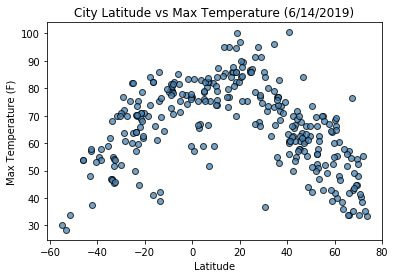

In [8]:
plt.scatter(WeatherDF["Lat"], WeatherDF["Max Temp"], facecolors = "steelblue", edgecolors = "black", alpha = 0.75)

ChartDate = WeatherDF["Date"][0]
ChartDate = pd.to_datetime(ChartDate, unit='s').date()

plt.grid
plt.title("City Latitude vs Max Temperature (" + str(ChartDate.month) + "/" + str(ChartDate.day) + "/" + str(ChartDate.year) + ")")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

plt.savefig("Temp_Scatter.png")

#### Latitude vs. Humidity Plot

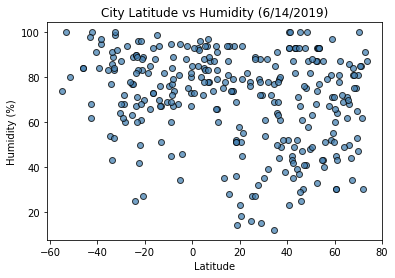

In [9]:
plt.scatter(WeatherDF["Lat"], WeatherDF["Humidity"], facecolors = "steelblue", edgecolors = "black", alpha = 0.75)

plt.grid
plt.title("City Latitude vs Humidity (" + str(ChartDate.month) + "/" + str(ChartDate.day) + "/" + str(ChartDate.year) + ")")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.savefig("Humidity_Scatter.png")

#### Latitude vs. Cloudiness Plot

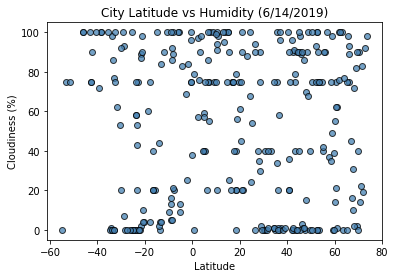

In [10]:
plt.scatter(WeatherDF["Lat"], WeatherDF["Cloudiness"], facecolors = "steelblue", edgecolors = "black", alpha = 0.75)

plt.grid
plt.title("City Latitude vs Humidity (" + str(ChartDate.month) + "/" + str(ChartDate.day) + "/" + str(ChartDate.year) + ")")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.savefig("Cloud_Scatter.png")

#### Latitude vs. Wind Speed Plot

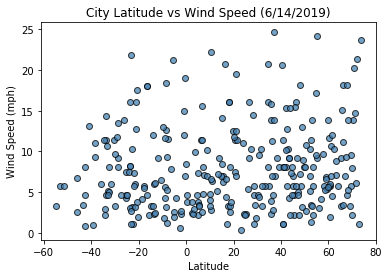

In [11]:
plt.scatter(WeatherDF["Lat"], WeatherDF["Wind Speed"], facecolors = "steelblue", edgecolors = "black", alpha = 0.75)

plt.grid
plt.title("City Latitude vs Wind Speed (" + str(ChartDate.month) + "/" + str(ChartDate.day) + "/" + str(ChartDate.year) + ")")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

plt.savefig("Wind_Scatter.png")